 # setup
 importing stuff and such

In [4]:
import spotipy
import matplotlib
import numpy as np
%matplotlib notebook
from matplotlib import pylab as plt
from matplotlib import mlab
sp = spotipy.Spotify()

# fetch all the playlist details that have 'punk' in the name
(note that this doesn't get the track lists, we'll do that a bit later)

In [2]:
results = sp.search(type='playlist', q='punk', limit=50)['playlists']
print "gathering details about", results['total'], "playlists"
punk_playlists = results['items']
while results['next']:
    results = sp.next(results)['playlists']
    punk_playlists += results['items']


gathering details about 5351 playlists


# basic stats
to get a feel for the dataset, let's to do some basic stats before we plow ahead with the track analysis
## title length
we expect a peak a 4 characters (the minimal 'Punk'), what else happens?

number of results: 5351



<IPython.core.display.Javascript object>


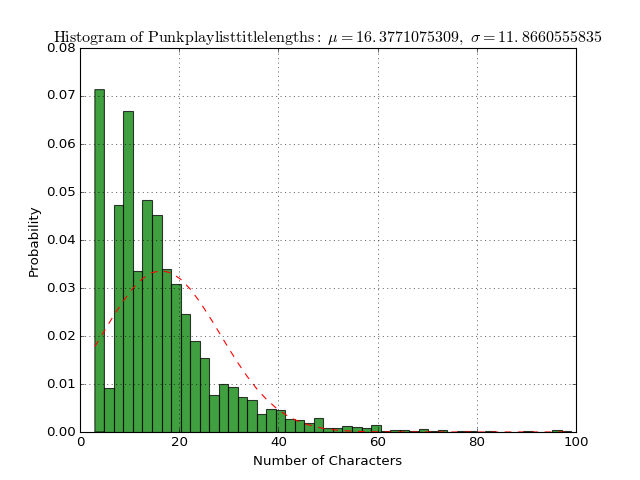

In [5]:
print "number of results:", len(punk_playlists)

print 
title_lengths = filter(lambda c:c<100, map(lambda pl:len(pl['name']), punk_playlists))
n, bins, patches = plt.hist(title_lengths, 50, normed=1, facecolor='green', alpha=0.75)
mu = np.mean(title_lengths)
sigma = np.std(title_lengths)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Number of Characters')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Punk playlist title lengths:}\ \mu='+str(mu)+',\ \sigma='+str(sigma)+'$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)





ok, so _a_ peak where expected, but the vast majority are longer, mean is just over 16 characters.

---

## word counts in the titles

So picking that apart a little more, let's take a look at some lightly cleaned word counts across all the titles

In [6]:
from collections import Counter
from string import punctuation
stopwords = "and of the or in".split()
print "top words in titles"
word_count = Counter()
for pl in punk_playlists:
    word_count.update([w.strip(punctuation) for w in pl['name'].lower().split() if w not in stopwords and len(w) > 2])
word_count.most_common(10)

top words in titles


[(u'punk', 4097),
 (u'pop', 1059),
 (u'rock', 991),
 (u'metal', 169),
 (u'daft', 118),
 (u'playlist', 113),
 (u'goes', 99),
 (u'rock/punk', 99),
 (u'hardcore', 92),
 (u'ska', 89)]

remember friends: Daft Punk may be playing in your house, your house, but it's a pretty good guess that when 'punk' is proceeded by 'daft' its probably not actually a punk playlist...

the other results here are basically the expected neighbouring genres (e.g. 'pop', 'rock', 'metal') and of course some self labelling ('playlist')

small aside, this seems to indicate that some of the playlists don't mention 'punk' in the name. Is that a problem? (this makes me wonder how the search algorithm works...). Let's see how many there are and what they look like.

### That's not punk.



In [11]:
print len([pl['name'] for pl in punk_playlists if "punk" not in pl['name'].lower()]), "of the search results don't say punk.\n here they are:"
print '\n'.join([pl['name'] for pl in punk_playlists if "punk" not in pl['name'].lower()])

87 of the search results don't say punk.
 here they are:
Pünk
Workout Shout!
French Touch
Post-Hardcore Crash Course
💰🔪☠
Post Garage Wave Revival
.01
New Rock
🌚 cool songs 🌝
Is It New Wave?
moosic
Locos x los 2010
Teenage Dirtbag
Skunk Rock
Crossfit Hutto Rock
math rock !
Dance Anthems - Ministry of Sound
Hits 2013
From The Garage
Cheap Beer & Dirty Basements
Proper Naughty
Canadians Rock!
Everything Rock
random
THE DEFINITIVE 70s
current songs
Arctic Monkeys: Origens
Emo/Emoish/Indierock
Rock 2
70's ROCK - The Ultimate Playlist
PØP PÛNK
Main Playlist
God tier 2.0
TOPSIFY 80s HITS
for when its cold outside
All Things Post
NOW 85
Die 257ers Party Playlist
Bare tunes
poleng's
Sweat Through This
Tank
Highschool Hits
Vidar
Quote Songs🖊💘
Best of '80s Indie • Alternative eighties
GRUNGE FOR LIFE
Main Playlist
De Boa na Praia
Mi playlist 
Today's Best Boy Bands Piano
Mixed Bag
Idk.
Sunday Breakfast
French Touch
Good. 
Originals vs Covers + Sampled
EMO
cool tunes 
Hard. Heavy. Loud.
Lounge & W

ok so there's 87 and many of which mention neighbouring genres, and a handful are only not matching 'punk' because they use some latin-1 misspellings (e.g. 'Pünk', 'PØP PÛNK')

I'm going to just go with the full search results, as the base dataset, filtering 